In [1]:
#

In [2]:
import numpy
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression

In [3]:
from risk_utils.risk_machine import RiskMachine

In [4]:
# Generate data

In [5]:
K = 10_000
N = 10_000
tt = numpy.array(numpy.arange(N))
portfolio = numpy.random.normal(loc=0.10, scale=10.00, size=(N,)).cumsum() + K
benchmark = numpy.random.normal(loc=0.01, scale=01.00, size=(N,)).cumsum() + K

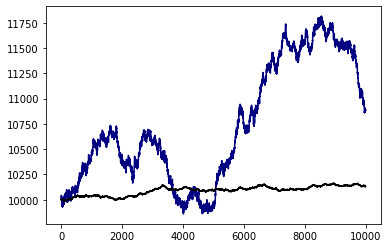

In [6]:
pyplot.plot(tt, portfolio, 'navy', tt, benchmark, 'black')
pyplot.show()

In [7]:
# Run the Risk-Machine

E:\venv\financial_news_re\lib\site-packages\risk_utils\risk_machine.py:98: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


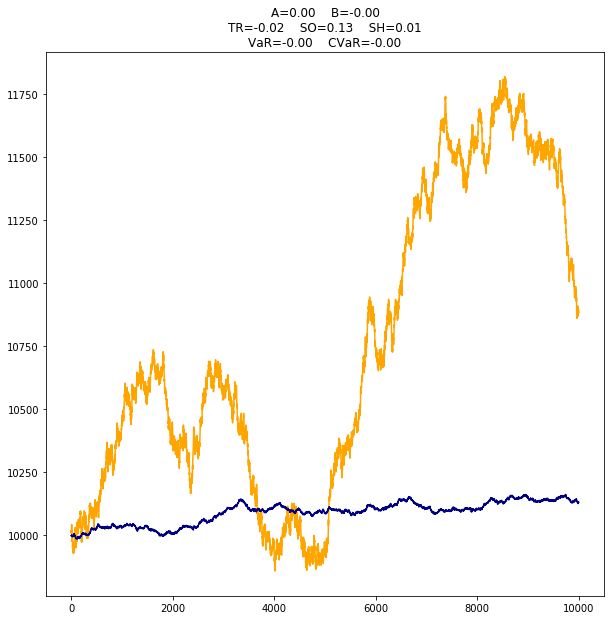

In [8]:
risk_machine = RiskMachine()
risk_machine.add_benchs([benchmark])
risk_machine.add_portfolios([portfolio])
risk_machine.summary()

In [9]:
# Calculate the rates manually

In [10]:
portfolio

array([10010.35909588, 10021.31358294, 10011.09026313, ...,
       10880.78483153, 10880.03183615, 10886.41394443])

In [11]:
portfolio_lagged = numpy.roll(portfolio, shift=1)
portfolio_lagged

array([10886.41394443, 10010.35909588, 10021.31358294, ...,
       10891.33694644, 10880.78483153, 10880.03183615])

In [12]:
portfolio_yield = portfolio / portfolio_lagged - 1
portfolio_yield = portfolio_yield[1:]
portfolio_yield

array([ 1.09431510e-03, -1.02015766e-03,  1.23592504e-04, ...,
       -9.68853958e-04, -6.92041425e-05,  5.86589119e-04])

In [13]:
benchmark

array([ 9999.84520294,  9999.43370293,  9997.74994209, ...,
       10131.00357687, 10132.70787316, 10132.30358122])

In [14]:
benchmark_lagged = numpy.roll(benchmark, shift=1)
benchmark_lagged

array([10132.30358122,  9999.84520294,  9999.43370293, ...,
       10130.55174643, 10131.00357687, 10132.70787316])

In [15]:
benchmark_yield = benchmark / benchmark_lagged - 1
benchmark_yield = benchmark_yield[1:]
benchmark_yield

array([-4.11506385e-05, -1.68385620e-04,  1.12687876e-04, ...,
        4.46007728e-05,  1.68225811e-04, -3.98996936e-05])

In [16]:
portfolio_yield.reshape(-1, 1)

array([[ 1.09431510e-03],
       [-1.02015766e-03],
       [ 1.23592504e-04],
       ...,
       [-9.68853958e-04],
       [-6.92041425e-05],
       [ 5.86589119e-04]])

In [17]:
lm = LinearRegression(fit_intercept=True)
lm.fit(portfolio_yield.reshape(-1, 1), benchmark_yield)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lm.intercept_

1.3248149815807303e-06

In [19]:
lm.coef_

array([-0.00043774])

In [20]:
treynor_ratio = (portfolio_yield - benchmark_yield).mean() / lm.coef_[0]
treynor_ratio

-0.0171602167518697

In [21]:
semi_deviation = (benchmark_yield[benchmark_yield < benchmark_yield.mean()]).std(ddof=1)
semi_deviation

5.939178120958869e-05

In [22]:
sortino_ratio = (portfolio_yield - benchmark_yield).mean() / semi_deviation
sortino_ratio

0.1264773929333129

In [23]:
sharpe_ratio = (portfolio_yield - benchmark_yield).mean() / (portfolio_yield - benchmark_yield).std(ddof=1)
sharpe_ratio

0.007938965058800283

In [24]:
value_at_risk = numpy.quantile(a=portfolio_yield, q=(1 - 0.99))
value_at_risk

-0.002123184508814624

In [25]:
conditional_value_at_risk = (portfolio_yield[portfolio_yield < value_at_risk]).mean()
conditional_value_at_risk

-0.00245451144074164